# Laboratorio: Natural Language Processing

**Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Proff. Gianluca Moro, Roberto Pasolini  
`nome.cognome@unibo.it`

## Setup Librerie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Natural Language Processing

- Con _Natural Language Processing_ (NLP) ci si riferisce all'insieme di tecniche per il processamento di testo in linguaggio naturale (inglese, italiano, ...)
- Obiettivo del NLP è estrarre informazioni di alto livello dal testo o convertirlo in una forma strutturata (es. vettori e matrici) trattabile da altri algoritmi

## NLTK

- _NLTK_ (_Natural Language Toolkit_) è una delle principali librerie Python per il trattamento di testi in linguaggio naturale
- Fornisce diversi algoritmi, spesso usati come componenti per pre-processare documenti di testo nell'ambito di processi di analisi dei dati

In [2]:
import nltk

- Alcuni algoritmi richiedono dati o modelli di conoscenza non distribuiti di default con la libreria (per limitarne le dimensioni)
- Dove necessari, viene usata la funzione `download` per scaricare i dati se non già presenti su disco
  - i dati scaricati sono salvati in una directory `nltk_data` nella propria home

## Segmentazione

- La _segmentazione_ (_tokenization_) consiste nella scomposizione di un testo in una **sequenza di elementi** (_token_)
- Comunemente la segmentazione è usata per estrarre le **singole parole** da un testo, includendo opzionalmente numeri, segni di punteggiatura, ...
- NLTK offre la funzione `word_tokenize` per scomporre una stringa in una lista di parole e segni di punteggiatura
- La funzione utilizza un modello della lingua inglese per scomporre correttamente alcune parole
- Usiamo la funzione `download` per scaricare tale modello (se non già scaricato)

In [3]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/pasolini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

- Sia data una frase d'esempio...

In [4]:
sentence = "This isn't an example, or is it?"

- ...potremmo utilizzare il metodo `split` di Python per suddividere la frase in parole separate dagli spazi

In [5]:
sentence.split()

['This', "isn't", 'an', 'example,', 'or', 'is', 'it?']

- Usando però `word_tokenize`, grazie alla conoscenza della lingua, sono correttamente separati segni di punteggiatura e anche parole composte come "isn't"

In [6]:
nltk.tokenize.word_tokenize(sentence)

['This', 'is', "n't", 'an', 'example', ',', 'or', 'is', 'it', '?']

## Bag of Words e Vector Space Model

- Nel modello _Bag of Words_ (BoW), un testo è rappresentato dall'**insieme delle parole in esso**
  - non si considera il loro ordine nella frase
- Definito un dizionario $D$ di parole distinte, possiamo rappresentare un testo (_documento_) con un vettore che associ ad ogni parola in $D$ il numero di occorrenze in esso
- Il _Vector Space Model_ prevede di rappresentare un insieme di documenti in uno **spazio vettoriale** comune, dove **le dimensioni corrispondono ai termini** di un dizionario comune
- Un insieme di documenti in uno spazio vettoriale è rappresentabile con una **_matrice documenti-termini_**, di cui ogni riga costituisce il vettore ricavato dal documento

## Definire uno Spazio Vettoriale

- Dato un insieme di documenti di testo (in questo caso semplici frasi)...

In [7]:
docs = [
    "the sky is blue",
    "sky is blue and sky is beautiful",
    "the beautiful sky is so blue",
    "i love blue cheese"
]

- Possiamo usare il filtro `CountVectorizer` fornito da scikit-learn per rappresentarli in uno spazio vettoriale

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

- Col metodo `fit_transform` costruiamo lo spazio vettoriale sulla base dei termini presenti nei documenti e otteniamo la matrice documenti-termini che li rappresenta
  - scikit-learn include un algoritmo basilare per segmentare le parole, usato di default da `CountVectorizer`

In [9]:
dtm = vect.fit_transform(docs)

- L'oggetto `dtm` ottenuto è una _matrice sparsa_, una struttura dati che rappresenta una matrice memorizzando in modo esplicito solamente i valori diversi da 0
  - in applicazioni reali tipiche, una matrice documenti-termini contiene molto meno del 10% di valori diversi da 0, si ottiene così un grande risparmio di memoria
- **Attenzione:** la matrice sparsa è simile ad un `ndarray` ma con alcune differenze, ad es. l'operatore `*`  esegue il prodotto canonico tra matrici piuttosto che quello elemento per elemento

- Per visualizzare i valori della matrice, possiamo convertirla in un array NumPy col metodo `toarray`
  - su questa matrice piccola non ci sono problemi di memoria, ma va usato con cautela su matrici più grandi!

In [10]:
dtm.toarray()

array([[0, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 1, 1, 0, 2, 0, 2, 0, 0],
       [0, 1, 1, 0, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 0]], dtype=int64)

- Per ottenere l'elenco dei termini nel dizionario costruito, usare il metodo `get_feature_names`
  - di default, ci sono tutte le parole distinte presenti nei documenti

In [11]:
vect.get_feature_names()

['and', 'beautiful', 'blue', 'cheese', 'is', 'love', 'sky', 'so', 'the']

- Le parole sono ordinate in modo concorde con le colonne della matrice documenti-termini

In [12]:
pd.DataFrame(dtm.toarray(), index=docs, columns=vect.get_feature_names())

,and,beautiful,blue,cheese,is,love,sky,so,the
the sky is blue,0,0,1,0,1,0,1,0,1
sky is blue and sky is beautiful,1,1,1,0,2,0,2,0,0
the beautiful sky is so blue,0,1,1,0,1,0,1,1,1
i love blue cheese,0,0,1,1,0,1,0,0,0


- Col metodo `transform`, possiamo rappresentare ulteriori documenti nel medesimo spazio vettoriale

In [13]:
new_doc = "loving this blue sky today"
vect.transform([new_doc]).toarray()

array([[0, 0, 1, 0, 0, 0, 1, 0, 0]])

In [14]:
pd.DataFrame(vect.transform([new_doc]).toarray(), index=[new_doc], columns=vect.get_feature_names())

,and,beautiful,blue,cheese,is,love,sky,so,the
loving this blue sky today,0,0,1,0,0,0,1,0,0


- Si noti che alcune parole del nuovo documento (es. "loving") si perdono nella trasformazione, in quanto non previste nello spazio vettoriale

## Caso d'Uso: Classificazione di Recensioni

- Sul Web sono continuamente pubblicate opinioni degli utenti, ad es. di film
  - alcune di queste (es. su Amazon) sono etichettate con un numero di stelle, che indicano se sia positiva o negativa
  - altre (es. messaggi sui forum) devono essere lette per capirne l'orientamento
- Vogliamo addestrare un classificatore su recensioni etichettate come positive o negative, in modo che sia in grado di stimare l'orientamento di opinioni non etichettate
- Utilizziamo un file di 10000 recensioni di film tratte da Amazon, a ciascuna delle quali è associato un punteggio da 1 a 5 stelle
- Utilizzando il vector space model, possiamo addestrare un modello sui conteggi di tutte le parole presenti nei documenti
- Carichiamo il file con le recensioni come visto in precedenza

In [15]:
import os
if not os.path.exists("reviews.csv.gz"):
    from urllib.request import urlretrieve
    urlretrieve("https://git.io/vpaDt", "reviews.csv.gz")

- Carichiamo il file come DataFrame con `read_csv`
  - il file è compresso col formato GZIP, riconosciuto automaticamente da pandas dall'estensione ".gz" (se non riconosciuto, specificare `compression="gzip"`)

In [16]:
reviews = pd.read_csv("reviews.csv.gz", sep="\t")

In [17]:
reviews.shape

(10000, 2)

- Il file contiene due colonne
  - in `text` troviamo il testo della recensione
  - in `stars` troviamo il numero di stelle date dall'utente, da 1 a 5
- Visioniamo alcune righe del dataset, aumentando prima il numero di caratteri visualizzati per parola

In [18]:
pd.options.display.max_colwidth = 100

In [19]:
reviews.tail(7)

,text,stars
9993,"Survivor series 2003 had alot on the line including jobs,titles and lives in the burried alive m...",4
9994,Dudley Boyz VS Ric Flair and Batista: This match was rather short. Dudley's looked good but Coac...,4
9995,"You seen one heist film, you seen them all. But every once in a while, somebody who really gives...",5
9996,"Often compared with ""The Big Chill"", and getting numerous stars in many reviews, this film simpl...",1
9997,This collection of Laurel and Hardy films contains five total selections. Four of these are sho...,3
9998,I love Vin Diesel but I wish I'd skipped this movie. The first bad sign was the fact that this t...,3
9999,"When The Office was first shown to a UK audience back in 2001, it was shown on BBC2. That is the...",5


## Analisi Esplorativa

- Quante recensioni abbiamo per ciascun numero di stelle?

In [20]:
reviews["stars"].value_counts()

5    4708
4    2620
3    1434
2     704
1     534
Name: stars, dtype: int64

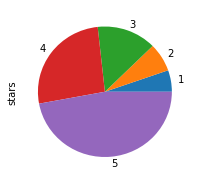

In [21]:
reviews["stars"].value_counts().sort_index().plot.pie(figsize=(3, 3))

- Quale lunghezza (in numero di caratteri) hanno le recensioni?
  - il metodo `str.len` trasforma una serie di testi nelle rispettive lunghezze

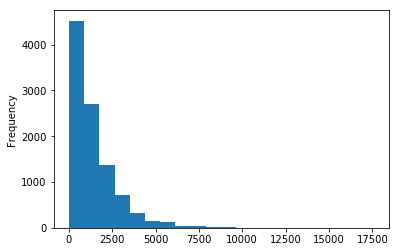

In [22]:
reviews["text"].str.len().plot.hist(bins=20)

## Recensioni Positive e Negative

- Per semplificare l'analisi, riduciamo le 5 possibili etichette a due
- Aggiungiamo una colonna "label" dove etichettiamo
  - come _positive_ ("pos") le recensioni con 4 o 5 stelle
  - come _negative_ ("neg") quelle con 3 stelle o meno

In [23]:
import numpy as np
reviews["label"] = np.where(reviews["stars"] >= 4, "pos", "neg")

- Il numero di recensioni che si ottengono di ciascun tipo è:

In [24]:
reviews["label"].value_counts()

pos    7328
neg    2672
Name: label, dtype: int64

In [25]:
reviews.tail(7)

,text,stars,label
9993,"Survivor series 2003 had alot on the line including jobs,titles and lives in the burried alive m...",4,pos
9994,Dudley Boyz VS Ric Flair and Batista: This match was rather short. Dudley's looked good but Coac...,4,pos
9995,"You seen one heist film, you seen them all. But every once in a while, somebody who really gives...",5,pos
9996,"Often compared with ""The Big Chill"", and getting numerous stars in many reviews, this film simpl...",1,neg
9997,This collection of Laurel and Hardy films contains five total selections. Four of these are sho...,3,neg
9998,I love Vin Diesel but I wish I'd skipped this movie. The first bad sign was the fact that this t...,3,neg
9999,"When The Office was first shown to a UK audience back in 2001, it was shown on BBC2. That is the...",5,pos


## Classificazione di Testi

- La matrice documenti-termini ha la forma di un dataset
  - ogni riga rappresenta un esempio (un testo) da classificare
  - ogni colonna rappresenta una variabile che caratterizza gli esempi
- Possiamo quindi addestrare un modello di classificazione su tale matrice per stimare l'orientamento delle recensioni
- Iniziamo suddividendo come al solito i dati in training set (70\%) e validation set (30\%)

In [26]:
from sklearn.model_selection import train_test_split
reviews_train, reviews_val = \
    train_test_split(reviews, test_size=0.3, random_state=42)

- Definiamo quindi lo spazio vettoriale in cui rappresentare le recensioni

In [27]:
vect = CountVectorizer()

- Costruiamo lo spazio vettoriale sul training set (quindi con le parole contenute in esso) e otteniamone la matrice documenti-termini

In [28]:
dtm_train = vect.fit_transform(reviews_train["text"])

- Otteniamo uno spazio con tante dimensioni quante le parole distinte nelle recensioni di training, ovvero...

In [29]:
len(vect.get_feature_names())

51772

- Esempi di parole estratte sono...

In [30]:
vect.get_feature_names()[1000:1010]

['abides',
 'abiding',
 'abigail',
 'abilene',
 'abilites',
 'abilities',
 'ability',
 'abit',
 'abition',
 'abject']

- La matrice è estremamente sparsa: la percentuale di termini non 0 è molto bassa

In [31]:
dtm_train.astype(bool).mean()

0.002740529905850931

- Rappresentiamo i documenti del validation set nello stesso spazio vettoriale, ottenendone la corrispondente matrice documenti-termini

In [32]:
dtm_val = vect.transform(reviews_val["text"])

- A questo punto creiamo un modello di classificazione e addestriamolo passando la matrice documenti-termini e le etichette delle recensioni relative al training set
  - usiamo ad es. la regressione logistica

In [33]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression(C=10)
lrm.fit(dtm_train, reviews_train["label"]);

- Usando matrice ed etichette del validation set possiamo valutare l'accuratezza del modello

In [34]:
lrm.score(dtm_val, reviews_val["label"])

0.79066666666666663

- Una volta addestrato il modello, possiamo usarlo per stimare come "positive" o "negative" altre recensioni
- Prendiamo ad esempio le seguenti due frasi...

In [35]:
new_reviews = ["What an awesome movie!", "It was really boring"]

- Una volta estratta la loro rappresentazione nello spazio vettoriale costruito sui documenti di training...

In [36]:
dtm_new = vect.transform(new_reviews)

- ...usando il metodo `predict` per ottenere le classi predette

In [37]:
lrm.predict(dtm_new)

array(['pos', 'neg'], dtype=object)

- Oltre ad una risposta secca ("positiva" o "negativa"), i classificatori possono fornire in genere una **distribuzione di probabilità** tra le possibili classi
- Per ottenerla usiamo il metodo `predict_proba`

In [38]:
lrm.predict_proba(dtm_new)

array([[ 0.02294871,  0.97705129],
       [ 0.59911844,  0.40088156]])

- Ogni elemento in riga i e colonna j della matrice indica la probabilità che la classe del i-esimo elemento da classificare sia la j-esima
- L'ordine in cui sono considerate le classi si può ottenere dall'attributo `classes_` del modello

In [39]:
lrm.classes_

array(['neg', 'pos'], dtype=object)

- Vediamo la matrice con righe e colonne etichettate per maggiore chiarezza

In [40]:
pd.DataFrame(lrm.predict_proba(dtm_new),
             index=new_reviews,
             columns=lrm.classes_)

,neg,pos
What an awesome movie!,0.022949,0.977051
It was really boring,0.599118,0.400882


- Vediamo quindi che il modello è sicuro al 98\% circa che la prima frase sia positiva e al 60\% che la seconda sia negativa

## Parametri del modello

- Possiamo accedere ai coefficienti lineari assegnati al modello per ciascuna variabile, ovvero per ciascun termine

In [41]:
lrm.coef_[0, :4]

array([ -8.16224281e-01,  -1.29820886e-01,   4.16113901e-02,
        -1.02112749e-05])

- Possiamo creare una serie che associ a ciascuno di questi coefficienti il termine corrispondente

In [42]:
coefs = pd.Series(lrm.coef_[0], index=vect.get_feature_names())

- Ordinando questa serie in base ai valori, vediamo quali i coefficienti più alti e più bassi e da questi quali parole contribuiscano di più a rendere una recensione positiva o negativa

In [43]:
coefs.sort_values(inplace=True)

- I coefficienti più bassi fanno tendere la decisione alla classe "0", in questo caso le recensioni negative...

In [44]:
coefs.head(10)

waste          -2.871880
wondering      -2.609906
disappointed   -2.484919
horrible       -2.333217
terrible       -2.329850
3rd            -2.111883
miscast        -2.055064
worst          -2.015429
decent         -1.992278
hype           -1.898268
dtype: float64

- ...mentre quelli più alti fanno tendere alla classe "1", le positive

In [45]:
coefs.tail(10)

realistic    1.822469
awesome      1.842950
gem          1.848051
excellent    1.884631
powerful     1.911671
amazing      1.921509
perfect      1.986372
highly       2.006586
hilarious    2.009481
tad          2.500362
dtype: float64

## Pipeline per Pre-processamento Testo e Classificazione

- Come visto in precedenza, una _pipeline_ di scikit-learn permette di concatenare ad un modello di predizione uno o più filtri che sono applicati automaticamente a tutti i dati
- Costruendo una pipeline con il `CountVectorizer` e il modello `LogisticRegression`, otteniamo un classificatore che accetta in input direttamente i testi, calcolando in automatico la loro conversione nello spazio vettoriale

In [46]:
from sklearn.pipeline import Pipeline
model = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("classifier", LogisticRegression(C=10))
])

- Addestrando e testando questo modello composito sugli stessi training e validation set, otteniamo gli stessi risultati senza estrarre manualmente le matrici documenti-termini

In [47]:
model.fit(reviews_train["text"], reviews_train["label"])
model.score(reviews_val["text"], reviews_val["label"])

0.79066666666666663

In [48]:
model.predict(new_reviews)

array(['pos', 'neg'], dtype=object)

## tf.idf

- Abbiamo visto che il `CountVectorizer` estrae una matrice in cui ogni elemento è il numero di occorrenze di un termine in un documento
- Esistono però metodi più avanzati per pesare la rilevanza di un termine in un documento
- È di uso comune il _tf.idf_ (_term frequency-inverse document frequency_), pari al prodotto di due fattori (di cui esistono diverse formulazioni)
  - il _tf_ indica l'**importanza locale** di un termine in un documento ed è pari al numero di occorrenze (o al suo logaritmo)
  - l'_idf_ indica l'**importanza globale** di un termine, tanto più alta quanto più il termine è poco comune nell'insieme complessivo dei documenti
  - comunemente, una volta calcolati tutti i pesi, **ciascun vettore è normalizzato** in modo da avere norma euclidea pari a 1, per appianare differenze di pesi tra documenti più o meno lunghi
- `TfidfVectorizer` è un filtro utilizzabile come alternativa a `CountVectorizer` per estrarre matrici documenti-termini basate sul tf.idf

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

- Calcoliamo ad esempio la matrice dei tf.idf per l'insieme di 4 frasi usate sopra...

In [50]:
vect = TfidfVectorizer()
dtm = vect.fit_transform(docs)
pd.DataFrame(dtm.toarray(), index=docs, columns=vect.get_feature_names())

,and,beautiful,blue,cheese,is,love,sky,so,the
the sky is blue,0.000000,0.000000,0.399210,0.000000,0.488291,0.000000,0.488291,0.00000,0.603137
sky is blue and sky is beautiful,0.440516,0.347308,0.229880,0.000000,0.562351,0.000000,0.562351,0.00000,0.000000
the beautiful sky is so blue,0.000000,0.432026,0.285953,0.000000,0.349762,0.000000,0.349762,0.54797,0.432026
i love blue cheese,0.000000,0.000000,0.346182,0.663385,0.000000,0.663385,0.000000,0.00000,0.000000


- Ad es. nell'ultimo documento "cheese" ha un peso maggiore di "blue" in quanto è una parola meno comune e quindi più discriminante

- Per testare l'uso del tf.idf nel classificatore di recensioni, sostituiamo il `CountVectorizer` con il `TfidfVectorizer`

In [51]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("classifier", LogisticRegression(C=10))
])

- Addestrando il modello sul training set e valutando l'accuratezza sul validation set come sopra...

In [52]:
model.fit(reviews_train["text"], reviews_train["label"])
model.score(reviews_val["text"], reviews_val["label"])

0.82499999999999996

- ...otteniamo un miglioramento dei risultati di qualche punto percentuale

## Riduzione della Dimensionalità

- Il numero di dimensioni generate considerando tutti i termini distinti presenti in tutti i documenti, come anche visto sopra, è molto alto

In [53]:
len(model.named_steps["vectorizer"].get_feature_names())

51772

- All'aumentare del numero di documenti, una tale quantità di dimensioni può comportare tempi di calcolo e uso di memoria eccessivi
- Esistono però modi per ridurre il numero di dimensioni con effetti spesso trascurabili sull'accuratezza finale del modello
- Ad esempio, impostando il parametro `min_df` di `TfidfVectorizer` (o `CountVectorizer`), limitiamo le parole nel dizionario dello spazio vettoriale a quelle presenti in almeno _N_ documenti di training

- Creiamo ad esempio un modello limitato alle parole che appaiono in almeno 3 documenti di training distinti

In [54]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(min_df=3)),
    ("classifier", LogisticRegression(C=10))
])
model.fit(reviews_train["text"], reviews_train["label"]);

- Il numero di feature è molto inferiore...

In [55]:
len(model.named_steps["vectorizer"].get_feature_names())

21063

- ...ma l'accuratezza è quasi identica

In [56]:
model.score(reviews_val["text"], reviews_val["label"])

0.82199999999999995

## Rimozione Stopword

- Le _stopword_ sono le parole usate nei testi per rendere complete le frasi, ma che prese da sole non danno alcuna informazione sulla semantica del testo
  - sono stopword ad es. articoli ("le"), preposizioni ("per"), congiunzioni ("ma"), ...
- Nella rappresentazione BOW di documenti è comune rimuovere a priori le stopword, in quanto non informative del contenuto
- Esistono diverse liste di stopword, NLTK ne integra alcune per diverse lingue
- Reperiamo la lista delle stopword inglesi...

In [57]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pasolini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
stoplist = nltk.corpus.stopwords.words("english")

- La lista include ad esempio le parole...

In [59]:
stoplist[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

- Nei vectorizer, possiamo configurare una lista di parole da escludere con un parametro `stop_words`

In [60]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(min_df=3, stop_words=stoplist)),
    ("classifier", LogisticRegression(C=10))
])
model.fit(reviews_train["text"], reviews_train["label"]);

- Rimuovendo le stopword, così come accade impostando `min_df`, otteniamo generalmente una riduzione delle feature con variazioni trascurabili di accuratezza

In [61]:
len(model.named_steps["vectorizer"].get_feature_names())

20922

In [62]:
model.score(reviews_val["text"], reviews_val["label"])

0.80966666666666665

## n-gram

- Un _n-gram_ è una **sequenza di _n_ parole consecutive** presenti in un testo
  - nei casi più comuni con n pari a 2 o 3 si parla rispettivamente di _bigram_ o _trigram_
  - ad es., nella frase "vado a New York", i bigram sono "vado a", "a New" e "New York"
- Così come le parole singole, anche gli n-gram possono essere usati come **feature per rappresentare i documenti**
  - alcuni n-gram possono essere significativi, rappresentando un termine composto da più parole (es. "New York")
  - ne rimangono però molti senza un significato specifico (es. "a New")

- Impostando in un vectorizer l'attributo `ngram_range` ad una **tupla `(a, b)`**, sono usate come feature le possibili **sequenze contenenti dalle a alle b parole**
  - l'impostazione di default è `(1, 1)`, per cui sono selezionate solo parole singole
  - impostando invece ad es. `(1, 2)` si selezionano sia le parole singole che i bigram
  - introducendo gli n-gram **il numero di termini distinti aumenta di molto**: è importante ridurli specificando un `min_df`

In [63]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(min_df=3, ngram_range=(1, 2))),
    ("classifier", LogisticRegression(C=10))
])
model.fit(reviews_train["text"], reviews_train["label"]);

In [64]:
len(model.named_steps["vectorizer"].get_feature_names())

100711

In [65]:
model.score(reviews_val["text"], reviews_val["label"])

0.82333333333333336

- I termini estratti includono parole singole e bigram significativi e non

In [66]:
model.named_steps["vectorizer"].get_feature_names()[-15:-5]

['zone and',
 'zone feel',
 'zone the',
 'zones',
 'zoo',
 'zooey',
 'zooey deschanel',
 'zoolander',
 'zoom',
 'zooming']

## POS Tagging

- Ad ogni parola in una frase è associata una **classe grammaticale**, detta _Part of Speech_ (POS)
  - ad alto livello le POS sono **_nome_, _verbo_, _aggettivo_, ecc.**
  - spesso si effettuano ulteriori distinzioni, ad es. nomi singolari e plurali
  - le POS possono includere anche i segni di punteggiatura
- Il _POS tagging_ etichetta ogni token di una sequenza (ottenuta dalla segmentazione) con il suo POS
  - è un processo non banale, in quanto una stessa parola può avere diverse POS a seconda del contesto (es. "letto" può essere nome o verbo)
- La funzione `pos_tag` prende una sequenza di token e restituisce una lista di tuple `(token, tag)`
  - i possibili tag sono elencati quì: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [67]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pasolini/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [68]:
nltk.pos_tag(nltk.tokenize.word_tokenize("This isn't an example, or is it?"))

[('This', 'DT'),
 ('is', 'VBZ'),
 ("n't", 'RB'),
 ('an', 'DT'),
 ('example', 'NN'),
 (',', ','),
 ('or', 'CC'),
 ('is', 'VBZ'),
 ('it', 'PRP'),
 ('?', '.')]

- Il POS tagging si può usare ad esempio per differenziare i termini in un BOW a seconda dell'uso che se ne fa nella frase
  - ad esempio, invece di avere un'unica feature "set", si possono avere feature "set (nome)" e "set (verbo)"
- Creiamo ad esempio una funzione che usa NLTK per segmentare un documento di testo e trasforma ciascun termine in una stringa "`termine/POS`"

In [69]:
def tokenize_with_pos(text):
    return ["{}/{}".format(token.lower(), tag) for token, tag
            in nltk.pos_tag(nltk.tokenize.word_tokenize(text))]

In [70]:
tokenize_with_pos("This isn't an example, or is it?")

['this/DT',
 'is/VBZ',
 "n't/RB",
 'an/DT',
 'example/NN',
 ',/,',
 'or/CC',
 'is/VBZ',
 'it/PRP',
 '?/.']

- In un vectorizer, possiamo specificare come parametro `tokenizer` una funzione per estrarre parole dai documenti da usare in alternativa a quella predefinita di scikit-learn
- Usiamo la funzione che abbiamo definito sopra, in modo da usare gli elementi "`termine/POS`" come feature

In [71]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(min_df=3, tokenizer=tokenize_with_pos)),
    ("classifier", LogisticRegression(C=10))
])
model.fit(reviews_train["text"], reviews_train["label"]);

In [72]:
len(model.named_steps["vectorizer"].get_feature_names())

26793

In [73]:
model.score(reviews_val["text"], reviews_val["label"])

0.81466666666666665

## Lemmatizzazione

- Estraendo dai documenti tutte le parole nella forma in cui sono scritte, otteniamo spesso molteplici forme di uno stesso _lemma_ (parola di un vocabolario)
  - es. le parole "estraggo", "estraendo", "estratto", ... sono tutte coniugazioni diverse del verbo "estrarre"
- La _lemmatizzazione_ è il processo che converte ciascuna parola di un testo nella sua forma base, quella in cui sono presentati in un dizionario
  - nomi al singolare, verbi all'infinito, ...
- In questo modo **raggruppiamo gruppi di termini simili**, riducendo la dimensionalità dello spazio senza perdita di informazione rilevante

- In NLTK possiamo creare un oggetto `WordNetLemmatizer` per lemmatizzare singole parole, delle quali va specificato il POS
  - i POS da passare sono n=nome, v=verbo, a=aggettivo, r=avverbio

In [74]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /home/pasolini/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [75]:
wnl = nltk.stem.WordNetLemmatizer()
wnl.lemmatize("mice", "n"), wnl.lemmatize("went", "v")

('mouse', 'go')

- Creiamo una funzione che segmenti le parole di un testo eseguendo la lemmatizzazione dove possibile
  - creiamo un dizionario con le corrispondenze tra le prime lettere dei POS in Penn Treebank visti sopra e questi

In [76]:
penn_to_wn = {"N": "n", "V": "v", "J": "a", "R": "r"}
def tokenize_with_lemmatization(text):
    return [(wnl.lemmatize(token, penn_to_wn[tag[0]]) if tag[0] in penn_to_wn else token)
            for token, tag in nltk.pos_tag(nltk.tokenize.word_tokenize(text))]

In [77]:
tokenize_with_lemmatization("We have shown many examples!")

['We', 'have', 'show', 'many', 'example', '!']

- La funzione ha estratto le parole, ma portando il verbo "show" e il nome "example" alle forme base

- Usiamo la funzione come `tokenizer` per la creazione dello spazio vettoriale

In [78]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(min_df=3, tokenizer=tokenize_with_lemmatization)),
    ("classifier", LogisticRegression(C=10))
])
model.fit(reviews_train["text"], reviews_train["label"]);

- Anche in questo modo otteniamo un numero di feature inferiore, tuttavia il tempo impiegato per il processamento del testo è elevato

In [79]:
len(model.named_steps["vectorizer"].get_feature_names())

18177

In [80]:
model.score(reviews_val["text"], reviews_val["label"])

0.82033333333333336

## Stemming

- Un algoritmo di _stemming_ estrae da una parola la sua **radice morfologica**
- Al contrario di un lemma, la radice di una parola può non essere di senso compiuto
- Termini diversi (anche come lemma) possono avere la stessa radice
- Ciònonostante, lo stemming è spesso usato come **alternativa alla lemmatizzazione**, in quanto
  - termini con la stessa radice sono spesso correlati, pur essendo lemmi diversi (es. nome "pesce" e verbo "pescare")
  - lo stemming non richiede il POS tagging ed è generalmente molto più efficiente
- NLTK integra diversi algoritmi di stemming, tra cui ad es. `PorterStemmer`

In [81]:
ps = nltk.stem.PorterStemmer()
ps.stem("lemmatization"), ps.stem("lemmatizer"), ps.stem("lemmatize")

('lemmat', 'lemmat', 'lemmat')

- Creiamo una funzione di segmentazione che applica lo stemming alle parole

In [82]:
def tokenize_with_stemming(text):
    return [ps.stem(token) for token
            in nltk.tokenize.word_tokenize(text)]

In [83]:
tokenize_with_stemming("We have shown many examples!")

['We', 'have', 'shown', 'mani', 'exampl', '!']

- Addestriamo e testiamo un modello con la solita procedura...

In [84]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(min_df=3, tokenizer=tokenize_with_stemming)),
    ("classifier", LogisticRegression(C=10))
])
model.fit(reviews_train["text"], reviews_train["label"]);

In [85]:
len(model.named_steps["vectorizer"].get_feature_names())

15956

In [86]:
model.score(reviews_val["text"], reviews_val["label"])

0.82433333333333336

## Sentiment Analysis in NLTK

- La stima dell'orientamento positivo o negativo di opinioni scritte è un problema molto comune
- Per questo esistono modelli preaddestrati, tra cui [_VADER_](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/viewPaper/8109) (_Valence Aware Dictionary and sEntiment Reasoner_)
- NLTK permette di utilizzare VADER per valutare l'orientamento di opinioni, senza bisogno di addestrare modelli
- Per usare VADER, scarichiamo i dati necessari e creiamo un oggetto `SentimentIntensityAnalyzer`

In [87]:
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/pasolini/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/home/pasolini/software/miniconda3/envs/dialab/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


- VADER si basa su un insieme di regole e su un dizionario (_lexicon_), che associa ad ogni parola un punteggio che ne denota la valenza positiva o negativa
- Oltre a parole della lingua inglese, il dizionario prevede anche termini abbreviati, slang e emoticon

In [88]:
vader.lexicon["excellent"]

2.7

In [89]:
vader.lexicon["sux"]

-1.5

In [90]:
vader.lexicon["n00b"]

-1.6

In [91]:
vader.lexicon[":)"]

2.0

- Per stimare la polarità di una frase, usiamo il metodo `polarity_scores`

In [92]:
vader.polarity_scores("What an awesome movie!")

{'compound': 0.6588, 'neg': 0.0, 'neu': 0.406, 'pos': 0.594}

In [93]:
vader.polarity_scores("It was really boring")

{'compound': -0.3804, 'neg': 0.464, 'neu': 0.536, 'pos': 0.0}

- I valori `pos`, `neg` e `neu` valutano quanto la frase sia positiva, negativa o neutra
- `compound` è un'aggregazione dei tre punteggi e riassume la polarità della frase

- Valutiamo il modello VADER sul nostro validation set
- Creiamo una funzione che associ ad ogni recensione un'etichetta "pos" o "neg" come i modelli
  - usiamo la funzione `sent_tokenize` per scomporre ciascuna recensione nelle singole frasi
  - una volta valutate le frasi una per una, si verifica la somma dei loro punteggi `compound`

In [94]:
def label_review(review):
    sentences = nltk.sent_tokenize(review)
    scores = list(map(vader.polarity_scores, sentences))
    return "pos" if sum(s["compound"] for s in scores) >= 0 else "neg"

- Testiamo la funzione sulle due frasi sopra

In [95]:
label_review("What an awesome movie!")

'pos'

In [96]:
label_review("It was really boring")

'neg'

- Estraiamo la lista delle classificazioni effettuate da VADER sul validation set...

In [97]:
vader_preds = [label_review(review) for review in reviews_val["text"]]

- ...e valutiamone l'accuratezza

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(reviews_val["label"], vader_preds)

0.73166666666666669

- L'accuratezza di VADER è di qualche punto inferiore a quella dei nostri modelli
- Si consideri che il modello VADER è più orientato all'analisi di testi brevi con largo uso di abbreviazioni ed emoticon (es. Twitter), mentre i modelli addestrati da noi sono specifici per queste recensioni

## Esercizi

1. Confrontare l'accuratezza ottenuta variando il parametro `min_df` di `TfidfVectorizer` da 1 a 5, e il parametro `C` di `LogisticRegression` a 1 e 100
  - è ammesso sia usare lo split train/validation già costruito che usare la cross validation con grid search
2. Addestrare e testare un modello in cui siano usati come termini solamente gli aggettivi
  - usare un tokenizer personalizzato che usi il POS tagging per individuare gli aggettivi

In [ ]:
from sklearn.model_selection import GridSearchCV
model = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("classifier", LogisticRegression())
])
gs = GridSearchCV(model, {"vectorizer__min_df": [1, 2, 3, 4, 5], "classifier__C": [1, 100]})
gs.fit(reviews_train.text, reviews_train.label)

In [ ]:
pd.DataFrame(gs.cv_results_)

In [ ]:
def tokenize_only_adjectives(text):
    return [token for token, tag
            in nltk.pos_tag(nltk.tokenize.word_tokenize(text))
            if tag[0] == "J"]
model = Pipeline([
    ("vectorizer", TfidfVectorizer(min_df=3, tokenizer=tokenize_only_adjectives)),
    ("classifier", LogisticRegression())
])
model.fit(reviews_train.text, reviews_train.label)

In [ ]:
model.score(reviews_val.text, reviews_val.label)